# Import and Downloads

## Install Modules

In [1]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 7.0 MB/s 


In [2]:
! git clone https://github.com/GuiSilvaPA/TextToImage.git

Cloning into 'TextToImage'...
remote: Enumerating objects: 259, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 259 (delta 18), reused 27 (delta 12), pack-reused 226
Receiving objects: 100% (259/259), 21.05 MiB | 28.81 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [3]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 8.1 MB/s 
     |████████████████████████████████| 596 kB 68.1 MB/s 
     |████████████████████████████████| 6.6 MB 54.7 MB/s 
     |████████████████████████████████| 101 kB 13.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
!pip install resize_right

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install einops_exts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Imports

In [7]:
import sys
sys.path.insert(0,'/content/TextToImage/Imagen')

In [8]:
import torch
from Imagen import Imagen

Downloading:   0%|          | 0.00/537 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/294M [00:00<?, ?B/s]

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.5.layer.1.layer_norm.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.3.layer.2.DenseReluDense.wo.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.0.SelfAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.1.layer.2.

Downloading:   0%|          | 0.00/773k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.81k [00:00<?, ?B/s]

In [9]:
from OldComplexModels import UNet
from ImagenTools import CustomDataset, ImagenTrainer

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.5.layer.1.layer_norm.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.3.layer.2.DenseReluDense.wo.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.0.SelfAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.1.layer.2.

In [10]:
from torch.utils.data import Dataset, DataLoader
import json
import h5py
import numpy as np
from torchvision import transforms
import random

import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch.nn as nn

from torch.optim import Adam
from pathlib import Path

import cv2

import torchvision.transforms as T

In [11]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## Download COCO Dataset

In [12]:
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/VAL_IMAGES_coco_5_cap_per_img.hdf5
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_CAPTIONS_coco_5_cap_per_img.json
!wget https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TRAIN_IMAGES_coco_5_cap_per_img.hdf5

--2022-07-20 20:08:52--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_CAPTIONS_coco_5_cap_per_img.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 289777 (283K) [application/json]
Saving to: ‘TEST_CAPTIONS_coco_5_cap_per_img.json’

TEST_CAPTIONS_coco_ 100%[===================>] 282.99K  --.-KB/s    in 0.002s  

2022-07-20 20:08:52 (138 MB/s) - ‘TEST_CAPTIONS_coco_5_cap_per_img.json’ saved [289777/289777]

--2022-07-20 20:08:52--  https://storage.googleapis.com/unicamp-dl/ia025a_2022s1/aula10/TEST_IMAGES_coco_5_cap_per_img.hdf5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request se

# Dataset and Model

In [13]:
from PIL import Image
from ImagenTools import CustomDataset, collate_any

In [14]:
train_set = CustomDataset("./TRAIN_IMAGES_coco_5_cap_per_img.hdf5", "./TRAIN_CAPTIONS_coco_5_cap_per_img.json", image_size=64)
val_set   = CustomDataset("./VAL_IMAGES_coco_5_cap_per_img.hdf5", "./VAL_CAPTIONS_coco_5_cap_per_img.json",     image_size=64)
test_set  = CustomDataset("./TEST_IMAGES_coco_5_cap_per_img.hdf5", "./TEST_CAPTIONS_coco_5_cap_per_img.json",   image_size=64)

## Dataset Tester

In [ ]:
train_loader = DataLoader(train_set, batch_size=10, collate_fn=collate_any)

In [ ]:
imgs, texts = next(iter(train_loader))

print(type(imgs), type(texts))

<class 'torch.Tensor'> <class 'numpy.ndarray'>


In [ ]:
texts

array(['A woman is holding a cat in her kitchen.',
       'A truck carries a large amount of items and a few people.',
       'A large boat filled with mean on wheels.',
       'A pigeon greets three bicyclists on a park path',
       'A white toilet sits on the front lawn.',
       'A donut on the antenna of a car.',
       'a cat with a big fluffy tail sitting on top of a car tire ',
       'A large jetliner flying over a traffic filled street.',
       'THERE IS A MAN WITH BOOK BAG ON HIS BAG ',
       'A horse drawn carriage is parked along the curb.'], dtype='<U58')

In [ ]:
imgs.shape

torch.Size([10, 3, 64, 64])

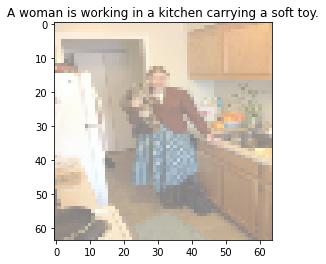

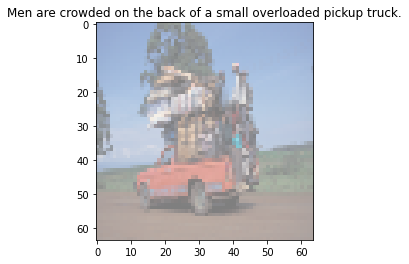

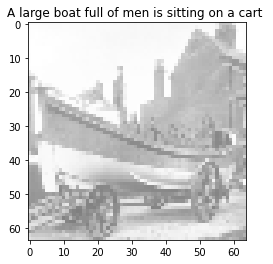

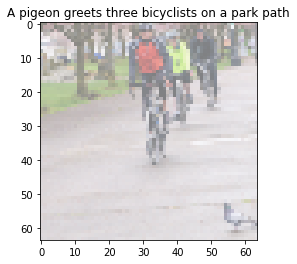

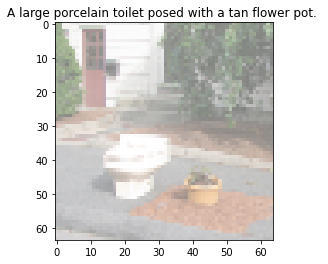

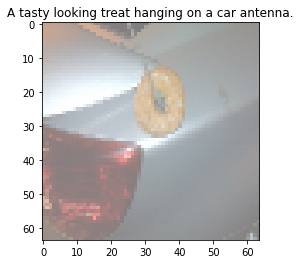

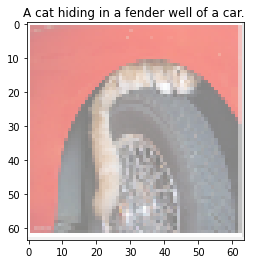

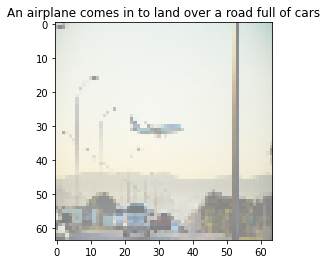

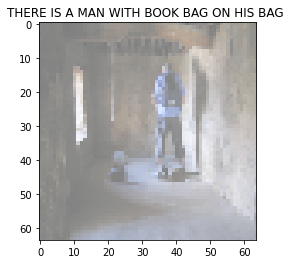

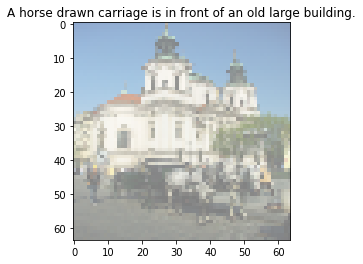

In [ ]:
imgs, texts = next(iter(train_loader))
for img, text in zip(imgs, texts):
    # Para apresentar as imagens é necessario desfazer a normalização empregada nas imagens
    plt.imshow((img.numpy().transpose(1, 2, 0)+1)/2) # adversarial
    plt.title(text)
    plt.show()

# Model Initialization

In [15]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cuda:0'

In [16]:
unet1 = UNet(dim = 64, cond_dim = 512, text_embed_dim = 512,  # 32
             dim_mults = (1, 2, 4, 8), num_resnet_blocks = 3, # (1, 2, 4, 8) - 3
             layer_attns = (False, True, True, True),
             layer_cross_attns = (False, True, True, True), device=device).to(device)

imgen_model = Imagen((unet1,), image_sizes=(64,), timesteps=4000,
                      text_encoder_name = 'google/t5-v1_1-small', cond_drop_prob = 0.3, device=device).to(device) # 0.1

Some weights of the model checkpoint at google/t5-v1_1-small were not used when initializing T5EncoderModel: ['decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.5.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.5.layer.1.layer_norm.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.3.layer.2.DenseReluDense.wo.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.3.layer.0.SelfAttention.v.weight', 'decoder.block.3.layer.1.EncDecAttention.o.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_0.weight', 'decoder.block.1.layer.0.SelfAttention.k.weight', 'decoder.block.0.layer.0.layer_norm.weight', 'decoder.block.4.layer.0.SelfAttention.v.weight', 'decoder.block.5.layer.0.SelfAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.2.DenseReluDense.wi_1.weight', 'decoder.block.1.layer.2.

In [ ]:
from functools import reduce

def pytorch_count_params(model):
    "count number trainable parameters in a pytorch model"
    total_params = sum(reduce( lambda a, b: a*b, x.size()) for x in model.parameters())
    return total_params

pytorch_count_params(unet1)

77532772

In [17]:
batch_size  = 20
num_workers = 2

train_loader = DataLoader(train_set,
                          shuffle=True,
                          batch_size=batch_size,
                          num_workers=num_workers,
                          collate_fn=collate_any)

val_loader = DataLoader(val_set,
                        batch_size=1,
                        num_workers=num_workers,
                        collate_fn=collate_any)

test_loader = DataLoader(test_set,
                         num_workers=num_workers,
                         collate_fn=collate_any)

# Model Training

In [18]:
from ImagenTools import ImagenTrainer

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 220, first_epoch=211, p=21, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer.load(path='/content/drive/MyDrive/TextToImage64/v6p21.pth.tar')

  0%|          | 0/10 [00:00<?, ?it/s]


================================ EPOCH 211 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 211 | Train Loss: 0.039165438410230485 | Valid Loss: 0.019427281812599378

================================ EPOCH 212 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 212 | Train Loss: 0.03890133673660964 | Valid Loss: 0.01987735199195188

================================ EPOCH 213 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 213 | Train Loss: 0.03887143134231343 | Valid Loss: 0.019706140347534182

================================ EPOCH 214 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 214 | Train Loss: 0.03923349783496082 | Valid Loss: 0.019442620972207832

================================ EPOCH 215 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 215 | Train Loss: 0.039349666177326825 | Valid Loss: 0.01933528353320313

================================ EPOCH 216 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 216 | Train Loss: 0.03913044898539503 | Valid Loss: 0.019148172845455835

================================ EPOCH 217 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 217 | Train Loss: 0.0391728488259575 | Valid Loss: 0.019156667374074402

================================ EPOCH 218 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 218 | Train Loss: 0.039020032030340206 | Valid Loss: 0.01966912343148565

================================ EPOCH 219 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 219 | Train Loss: 0.03859059502003195 | Valid Loss: 0.019700781384321638

================================ EPOCH 220 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 220 | Train Loss: 0.038725411601770086 | Valid Loss: 0.01888942203621889


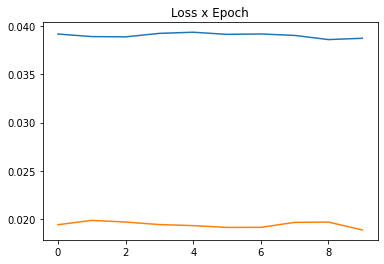

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 230, first_epoch=221, p=22, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/10 [00:00<?, ?it/s]


================================ EPOCH 221 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 221 | Train Loss: 0.039607552618269815 | Valid Loss: 0.018966392144288476

================================ EPOCH 222 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 222 | Train Loss: 0.03890220077112824 | Valid Loss: 0.019087640742337868

================================ EPOCH 223 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 223 | Train Loss: 0.03868959259897547 | Valid Loss: 0.018922129781752294

================================ EPOCH 224 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 224 | Train Loss: 0.03896454762632572 | Valid Loss: 0.018668600035741254

================================ EPOCH 225 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 225 | Train Loss: 0.03848089007375648 | Valid Loss: 0.019097571189511917

================================ EPOCH 226 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 226 | Train Loss: 0.03880789210437005 | Valid Loss: 0.01888840968637398

================================ EPOCH 227 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 227 | Train Loss: 0.039495372340133804 | Valid Loss: 0.019046209928621237

================================ EPOCH 228 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 228 | Train Loss: 0.038887742480744614 | Valid Loss: 0.01940418835304284

================================ EPOCH 229 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 229 | Train Loss: 0.038835604733717784 | Valid Loss: 0.01953390041643453

================================ EPOCH 230 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 230 | Train Loss: 0.03879752229633076 | Valid Loss: 0.019509535748636047


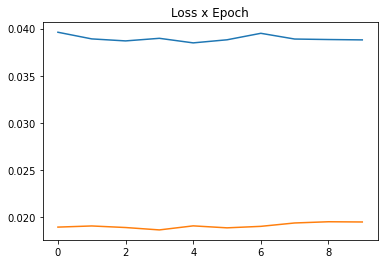

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 250, first_epoch=231, p=23, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 231 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 231 | Train Loss: 0.03884671779102361 | Valid Loss: 0.019754664271553365

================================ EPOCH 232 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 232 | Train Loss: 0.039366921607157865 | Valid Loss: 0.019014554576497453

================================ EPOCH 233 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 233 | Train Loss: 0.039239840502819034 | Valid Loss: 0.018650382175760413

================================ EPOCH 234 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 234 | Train Loss: 0.0392525063235262 | Valid Loss: 0.01937514282667421

================================ EPOCH 235 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 235 | Train Loss: 0.03902531816342174 | Valid Loss: 0.020075021659233708

================================ EPOCH 236 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 236 | Train Loss: 0.03872656506378533 | Valid Loss: 0.01960761651795463

================================ EPOCH 237 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 237 | Train Loss: 0.03914624574074686 | Valid Loss: 0.018693603533731788

================================ EPOCH 238 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 238 | Train Loss: 0.038781044599251684 | Valid Loss: 0.019047455782869007

================================ EPOCH 239 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 239 | Train Loss: 0.03902793132231197 | Valid Loss: 0.019450084747069177

================================ EPOCH 240 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 240 | Train Loss: 0.039053339376526115 | Valid Loss: 0.019241898484815396

================================ EPOCH 241 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 241 | Train Loss: 0.03910439162749518 | Valid Loss: 0.01920611999356336

================================ EPOCH 242 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 242 | Train Loss: 0.038833049122801645 | Valid Loss: 0.019158872882057896

================================ EPOCH 243 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 243 | Train Loss: 0.03885898119009727 | Valid Loss: 0.019920239129211394

================================ EPOCH 244 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 244 | Train Loss: 0.03892147014088625 | Valid Loss: 0.018542285400742726

================================ EPOCH 245 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 245 | Train Loss: 0.03869067522266335 | Valid Loss: 0.019221587017572598

================================ EPOCH 246 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 246 | Train Loss: 0.038891190275720945 | Valid Loss: 0.018950131379824597

================================ EPOCH 247 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 247 | Train Loss: 0.039083778348174836 | Valid Loss: 0.018365398478297153

================================ EPOCH 248 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 248 | Train Loss: 0.03863952478922929 | Valid Loss: 0.018626370135912854

================================ EPOCH 249 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 249 | Train Loss: 0.0393995777981001 | Valid Loss: 0.019786642530931972

================================ EPOCH 250 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 250 | Train Loss: 0.03925303915170256 | Valid Loss: 0.018830864014230272


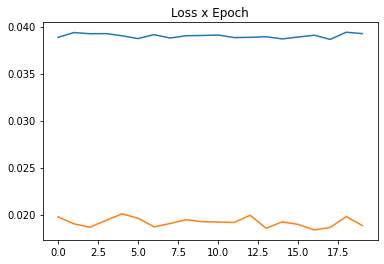

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

In [ ]:
trainer = ImagenTrainer(imgen_model, epochs = 280, first_epoch=251, p=25, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [ ]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/TextToImage64/v6p')

  0%|          | 0/30 [00:00<?, ?it/s]


================================ EPOCH 251 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 251 | Train Loss: 0.039048505707827655 | Valid Loss: 0.019140319675445334

================================ EPOCH 252 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 252 | Train Loss: 0.039036508201349046 | Valid Loss: 0.01911955430242128

================================ EPOCH 253 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 253 | Train Loss: 0.03882835172100917 | Valid Loss: 0.019280578944205304

================================ EPOCH 254 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 254 | Train Loss: 0.03912143918786983 | Valid Loss: 0.01972531403272761

================================ EPOCH 255 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 255 | Train Loss: 0.03886146206871233 | Valid Loss: 0.01980182991332455

================================ EPOCH 256 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 256 | Train Loss: 0.03878500565195925 | Valid Loss: 0.019658540273518613

================================ EPOCH 257 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 257 | Train Loss: 0.03865417531298689 | Valid Loss: 0.019545324724314764

================================ EPOCH 258 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 258 | Train Loss: 0.0386981164488536 | Valid Loss: 0.019497478803856116

================================ EPOCH 259 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 259 | Train Loss: 0.03847011519424921 | Valid Loss: 0.019545925980936057

================================ EPOCH 260 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

In [19]:
trainer = ImagenTrainer(imgen_model, epochs = 280, first_epoch=260, p=26, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

In [20]:
trainer.load(path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p26.pth.tar')

  0%|          | 0/21 [00:00<?, ?it/s]


================================ EPOCH 260 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 260 | Train Loss: 0.03884884858738352 | Valid Loss: 0.019232392042107083

================================ EPOCH 261 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 261 | Train Loss: 0.038929742317469346 | Valid Loss: 0.019856443879454167

================================ EPOCH 262 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 262 | Train Loss: 0.039020901564888806 | Valid Loss: 0.01989784034906011

================================ EPOCH 263 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 263 | Train Loss: 0.03881931186457272 | Valid Loss: 0.01953729355017987

================================ EPOCH 264 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 264 | Train Loss: 0.038948962021441685 | Valid Loss: 0.01965897798872764

================================ EPOCH 265 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 265 | Train Loss: 0.03886153275023538 | Valid Loss: 0.019145805897833167

================================ EPOCH 266 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 266 | Train Loss: 0.03859174955591914 | Valid Loss: 0.019682908595033966

================================ EPOCH 267 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 267 | Train Loss: 0.038660033551348866 | Valid Loss: 0.019037065300804696

================================ EPOCH 268 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 268 | Train Loss: 0.03889458820692637 | Valid Loss: 0.01865330967543413

================================ EPOCH 269 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 269 | Train Loss: 0.03878245458282454 | Valid Loss: 0.018896192389481946

================================ EPOCH 270 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 270 | Train Loss: 0.03904580565717477 | Valid Loss: 0.018506808017485443

================================ EPOCH 271 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 271 | Train Loss: 0.03867590741007304 | Valid Loss: 0.01891586266405277

================================ EPOCH 272 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 272 | Train Loss: 0.03927484190338576 | Valid Loss: 0.01874971274423756

================================ EPOCH 273 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 273 | Train Loss: 0.03886588876370062 | Valid Loss: 0.019571397412435982

================================ EPOCH 274 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 274 | Train Loss: 0.03919643802856583 | Valid Loss: 0.01888209994691704

================================ EPOCH 275 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 275 | Train Loss: 0.039276425847878715 | Valid Loss: 0.019756664747657554

================================ EPOCH 276 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 276 | Train Loss: 0.03902988525687204 | Valid Loss: 0.01867484696218809

================================ EPOCH 277 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 277 | Train Loss: 0.03870852339100473 | Valid Loss: 0.01897010421136393

================================ EPOCH 278 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 278 | Train Loss: 0.03897139084839015 | Valid Loss: 0.01947117755882414

================================ EPOCH 279 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 279 | Train Loss: 0.03854631625834954 | Valid Loss: 0.019453337166789025

================================ EPOCH 280 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 280 | Train Loss: 0.03874720321559556 | Valid Loss: 0.019468280302027897


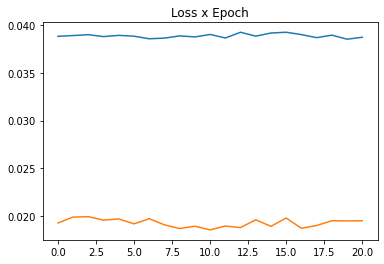

In [22]:
trainer(train_loader, val_loader,
        path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p',
        inter_path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p26.pth.tar')

In [23]:
trainer = ImagenTrainer(imgen_model, epochs = 300, first_epoch=281, p=28, lr = 1e-4, eps = 1e-8, beta1 = 0.9, beta2 = 0.99, device=device)

  0%|          | 0/20 [00:00<?, ?it/s]


================================ EPOCH 281 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 281 | Train Loss: 0.03882067767763827 | Valid Loss: 0.019078647836296068

================================ EPOCH 282 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 282 | Train Loss: 0.03877782895226589 | Valid Loss: 0.01876420679471564

================================ EPOCH 283 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 283 | Train Loss: 0.03904583446402736 | Valid Loss: 0.019185950115459788

================================ EPOCH 284 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 284 | Train Loss: 0.03903970789943575 | Valid Loss: 0.019820101374814825

================================ EPOCH 285 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 285 | Train Loss: 0.03850717683794724 | Valid Loss: 0.019058154817463813

================================ EPOCH 286 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 286 | Train Loss: 0.038756315550469114 | Valid Loss: 0.018857799324552768

================================ EPOCH 287 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 287 | Train Loss: 0.03934466551995652 | Valid Loss: 0.019601914561964195

================================ EPOCH 288 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 288 | Train Loss: 0.03876997015936313 | Valid Loss: 0.019218192465319837

================================ EPOCH 289 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 289 | Train Loss: 0.038845389481114385 | Valid Loss: 0.019031438479056865

================================ EPOCH 290 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 290 | Train Loss: 0.03889952167127358 | Valid Loss: 0.018703911033388847

================================ EPOCH 291 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 291 | Train Loss: 0.03851019231076701 | Valid Loss: 0.019423365244678862

================================ EPOCH 292 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 292 | Train Loss: 0.0386377543616457 | Valid Loss: 0.01887058745859414

================================ EPOCH 293 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 293 | Train Loss: 0.03867549310694924 | Valid Loss: 0.019089086031745785

================================ EPOCH 294 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 294 | Train Loss: 0.03920130028633312 | Valid Loss: 0.01913529453631505

================================ EPOCH 295 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 295 | Train Loss: 0.03850614851765132 | Valid Loss: 0.018652519090123807

================================ EPOCH 296 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 296 | Train Loss: 0.03917019698946249 | Valid Loss: 0.019360628456818806

================================ EPOCH 297 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 297 | Train Loss: 0.03888674852910268 | Valid Loss: 0.01902936867451619

================================ EPOCH 298 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 298 | Train Loss: 0.03863485522257785 | Valid Loss: 0.01904976845991229

================================ EPOCH 299 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 299 | Train Loss: 0.03896736292022781 | Valid Loss: 0.019021030954915412

================================ EPOCH 300 ================================



  0%|          | 0/1176 [00:00<?, ?it/s]

  0%|          | 0/1052 [00:00<?, ?it/s]


Epoch: 300 | Train Loss: 0.03885699063381117 | Valid Loss: 0.01883813568295793


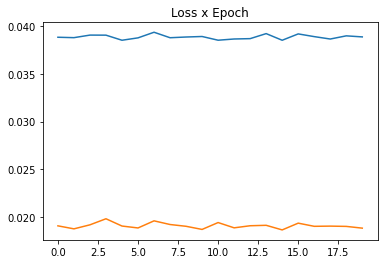

In [24]:
trainer(train_loader, val_loader, path='/content/drive/MyDrive/Guilherme/vraie_TextToImage64/v6p')